# ДЗ №1 СУНЦ МГУ - Numpy practice

_Задачи позаимствованы из курса ML ФКН ПМИ где они были позаимствованы из курса практикума кафедры ММП факультета ВМК МГУ_ 

### Туториальные задачи
__(9 баллов)__

Ниже приведены задачи на работу с numpy-массивами. Для каждой из задач нужно привести 2 реализации: одна без использования numpy (cчитайте, что там, где на входе или выходе должны быть numpy array, будут просто списки), а вторая полностью векторизованная (без использования питоновских циклов/map/list comprehension). Невекторизованная реализация каждой из задач оценивается в __0.5 балла__, векторизованная – в __1 балл__.

Реализации без использования векторизации нужно записать в файл functions.py, а векторизованные &mdash; в файл functions_vectorized.py

Для каждой задачи, приведённой ниже сравните скорость работы невекторизованной и векторизованной реализации. С помощью пакета matplotlib постройте графики времени работы в зависимости от размера данных. __Графики должны выглядеть опрятно!__ То есть должны быть подписаны оси, названия графиков, и т.д. Например, ниже представлены хороший и плохой графики:

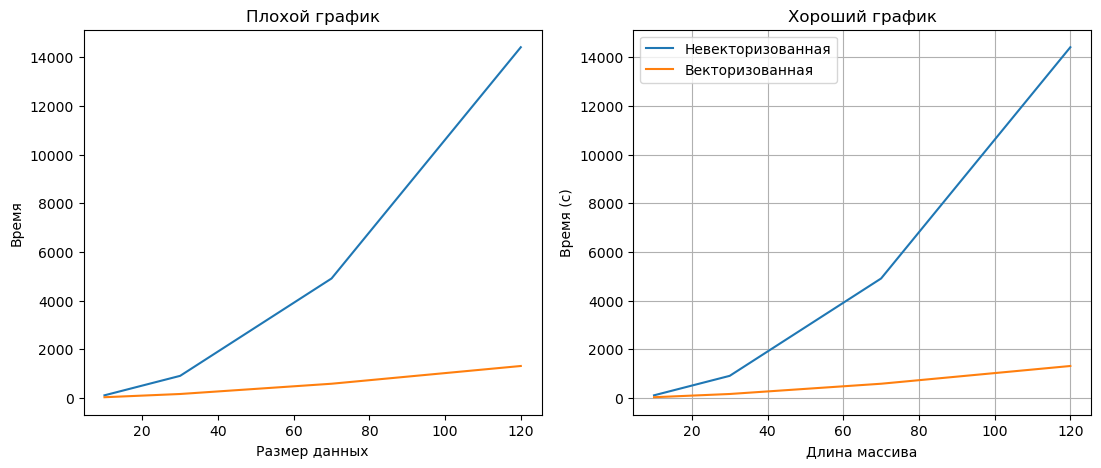

In [6]:
import matplotlib.pyplot as plt
import numpy as np

#%matplotlib inline

data_size = np.array([10, 30, 70, 120])
time_non_vectorized = data_size ** 2 + 10
time_vectorized = data_size ** 1.5

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

ax1.plot(data_size, time_non_vectorized)
ax1.plot(data_size, time_vectorized)
ax1.set_title(u"Плохой график")
ax1.set_xlabel(u"Размер данных")
ax1.set_ylabel(u"Время")

ax2.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
ax2.plot(data_size, time_vectorized, label=u"Векторизованная")
ax2.set_title(u"Хороший график")
ax2.set_xlabel(u"Длина массива")
ax2.set_ylabel(u"Время (с)")
ax2.grid()
ax2.legend()

plt.show()              

* __Задача 1__: Подсчитать произведение ненулевых элементов на диагонали прямоугольной матрицы.  
 Например, для X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]) ответ – 3.

c:\Users\Егор\Documents\прог\ml\task1\functions.py:10: RuntimeWarning: overflow encountered in scalar multiply
  ans *= x[i][i]


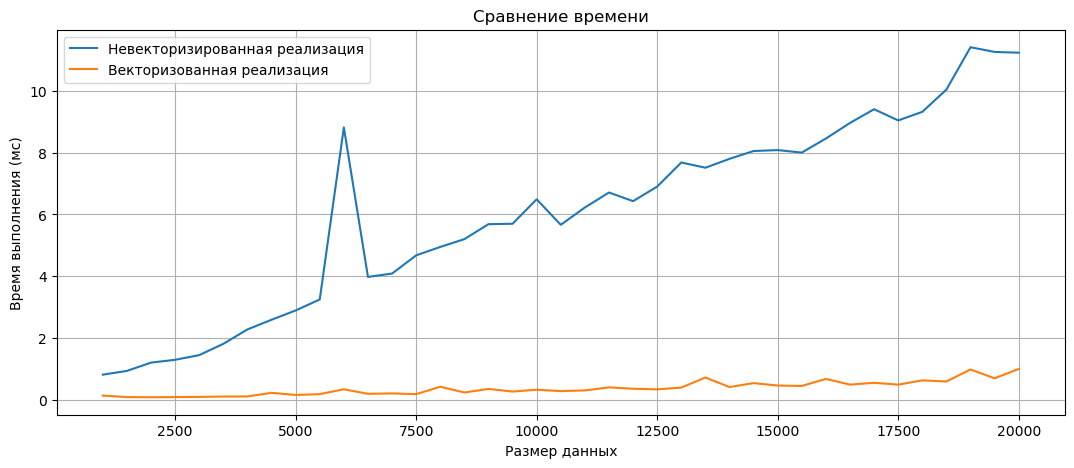

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import time
import functions
import functions_vectorized

sizes = []
for i in range(1000, 20001, 500):
    sizes.append(i)

times_regular = np.zeros(len(sizes))
times_vector = np.zeros(len(sizes))

for idx, size in enumerate(sizes):
    arr = np.random.randint(100, size=(size, size))
    
    start = time.time() * 1000
    functions.prod_non_zero_diag(arr)
    times_regular[idx] = time.time() * 1000 - start
    
    start = time.time() * 1000
    functions_vectorized.prod_non_zero_diag(arr)
    times_vector[idx] = time.time() * 1000 - start

fig, plot = plt.subplots(1, 1, figsize=(13, 5))

plot.plot(sizes, times_regular, label=u"Невекторизированная реализация")
plot.plot(sizes, times_vector, label=u"Векторизованная реализация")
plot.set_title(u"Сравнение времени")
plot.set_xlabel(u"Размер данных")
plot.set_ylabel(u"Время выполнения (мс)")
plot.grid()
plot.legend()

plt.show()

 
 
* __Задача 2__: Даны два вектора x и y. Проверить, задают ли они одно и то же мультимножество.  
  Например, для x = np.array([1, 2, 2, 4]), y = np.array([4, 2, 1, 2]) ответ – True.
  
  


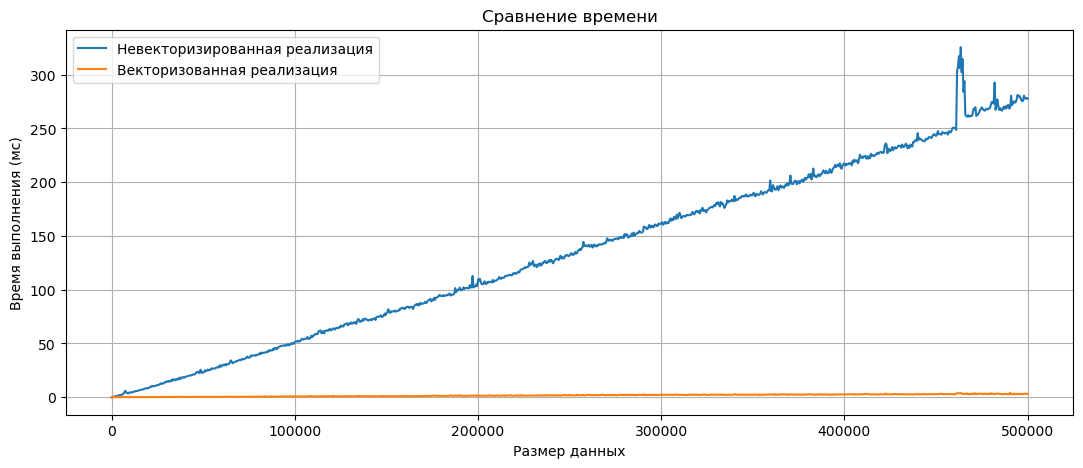

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import time
import functions
import functions_vectorized

dimensions = []
for i in range(0, 500001, 500):
    dimensions.append(i)

standard_times = np.zeros(len(dimensions))
optimized_times = np.zeros(len(dimensions))

for idx, dim in enumerate(dimensions):
    arr1 = np.random.randint(1000, size=dim)
    arr2 = np.random.randint(1000, size=dim)
    
    start_time = time.time() * 1000
    functions.are_multisets_equal(arr1, arr2)
    standard_times[idx] = time.time() * 1000 - start_time
    
    start_time = time.time() * 1000
    functions_vectorized.are_multisets_equal(arr1, arr2)
    optimized_times[idx] = time.time() * 1000 - start_time

figure, axis = plt.subplots(1, 1, figsize=(13, 5))

axis.plot(dimensions, standard_times, label=u"Невекторизированная реализация")
axis.plot(dimensions, optimized_times, label=u"Векторизованная реализация")
axis.set_title(u"Сравнение времени")
axis.set_xlabel(u"Размер данных")
axis.set_ylabel(u"Время выполнения (мс)")
axis.grid()
axis.legend()

plt.show()

* __Задача 3__: Найти максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой.  
 Например, для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответ – 5.

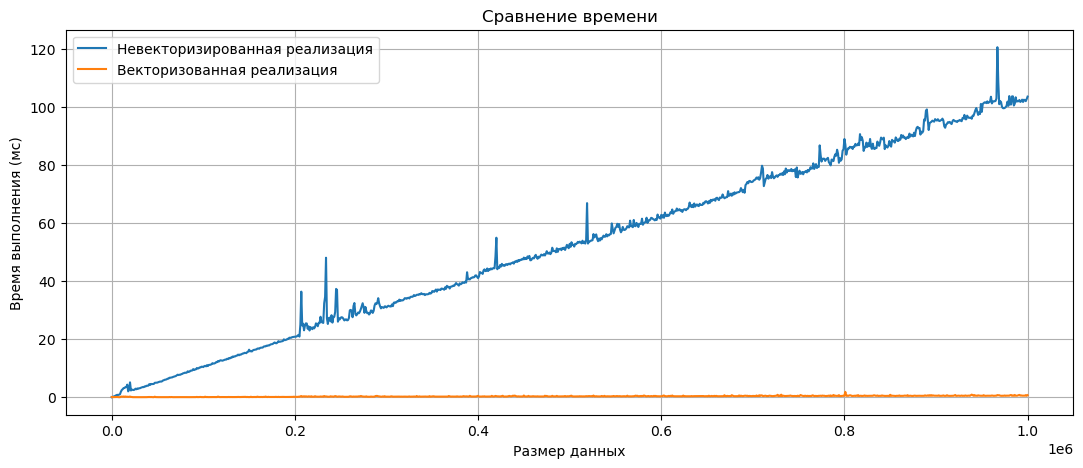

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import time
import functions
import functions_vectorized

sizes = []
for j in range(0, 1000001, 1000):
    sizes.append(j)

times_standard = np.zeros(len(sizes))
times_fast = np.zeros(len(sizes))

for k in range(0, len(sizes)):
    data = np.random.randint(1000, size=sizes[k])
    
    start = time.time() * 1000
    functions.max_after_zero(data)
    times_standard[k] = time.time() * 1000 - start
    
    start = time.time() * 1000
    functions_vectorized.max_after_zero(data)
    times_fast[k] = time.time() * 1000 - start

fig, plot_area = plt.subplots(1, 1, figsize=(13, 5))

plot_area.plot(sizes, times_standard, label=u"Невекторизированная реализация")
plot_area.plot(sizes, times_fast, label=u"Векторизованная реализация")
plot_area.set_title(u"Сравнение времени")
plot_area.set_xlabel(u"Размер данных")
plot_area.set_ylabel(u"Время выполнения (мс)")
plot_area.grid()
plot_area.legend()

plt.show()

 
 
* __ Задача 4__: Дан трёхмерный массив, содержащий изображение, размера (height, width, numChannels), а также вектор длины numChannels. Сложить каналы изображения с указанными весами, и вернуть результат в виде матрицы размера (height, width). В ноутбуке приведите пример работы функции – преобразуйте цветное изображение в оттенки серого, использовав коэффициенты np.array([0.299, 0.587, 0.114]). Считать реальное изображение можно при помощи функции scipy.misc.imread (если изображение не в формате png, установите пакет pillow).


(785, 720, 3) (785, 720)


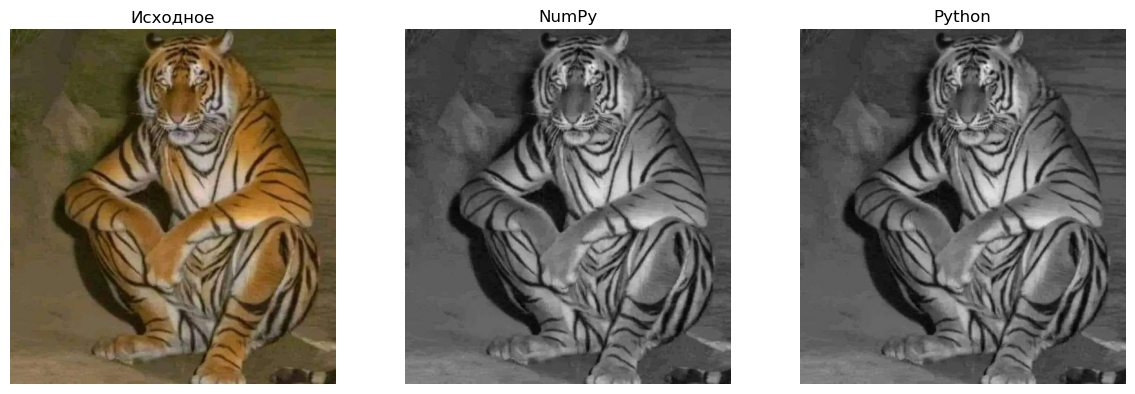

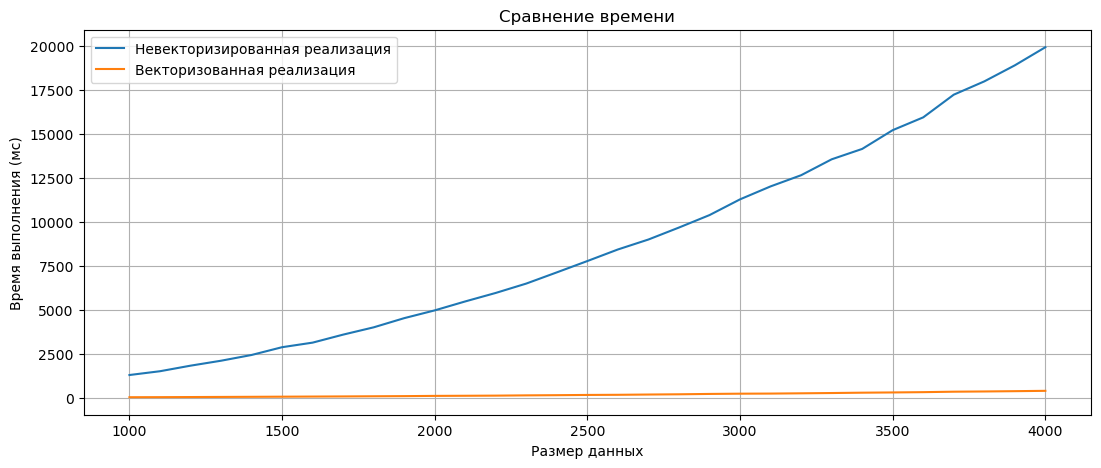

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import time
import functions
import functions_vectorized

weights = [0.299, 0.587, 0.114]
original_image = plt.imread("img.jpg")[:,:,:3] 
grey_numpy = functions_vectorized.convert_image(original_image, weights)
grey_python = np.array(functions.convert_image(original_image, weights))

print(original_image.shape, grey_python.shape)

fig, subplots = plt.subplots(1, 3, figsize=(12, 4))

subplots[0].imshow(original_image)
subplots[0].axis('off')
subplots[0].set_title('Исходное')

subplots[1].imshow(grey_numpy, cmap='gray')
subplots[1].axis('off')
subplots[1].set_title('NumPy')

subplots[2].imshow(grey_python, cmap='gray')
subplots[2].axis('off')
subplots[2].set_title('Python')

plt.tight_layout()
plt.show()

dimensions = []
for i in range(1000, 4001, 100):
    dimensions.append(i)

standard_times = np.zeros(len(dimensions))
fast_times = np.zeros(len(dimensions))

for j in range(0, len(dimensions)):
    image_data = np.random.rand(dimensions[j], dimensions[j], 3) * 256

    start = time.time() * 1000
    functions.convert_image(image_data, weights)
    standard_times[j] = time.time() * 1000 - start

    start = time.time() * 1000
    functions_vectorized.convert_image(image_data, weights)
    fast_times[j] = time.time() * 1000 - start

figure, plot_area = plt.subplots(1, 1, figsize=(13, 5))

plot_area.plot(dimensions, standard_times, label=u"Невекторизированная реализация")
plot_area.plot(dimensions, fast_times, label=u"Векторизованная реализация")
plot_area.set_title(u"Сравнение времени")
plot_area.set_xlabel(u"Размер данных")
plot_area.set_ylabel(u"Время выполнения (мс)")
plot_area.grid()
plot_area.legend()

* __Задача 5__: Реализовать кодирование длин серий (Run-length encoding). Для некоторого вектора x необходимо вернуть кортеж из двух векторов одинаковой длины. Первый содержит числа, а второй - сколько раз их нужно повторить.  
 Например, для x = np.array([2, 2, 2, 3, 3, 3, 5]) ответ – (np.array([2, 3, 5]), np.array([3, 3, 1])).

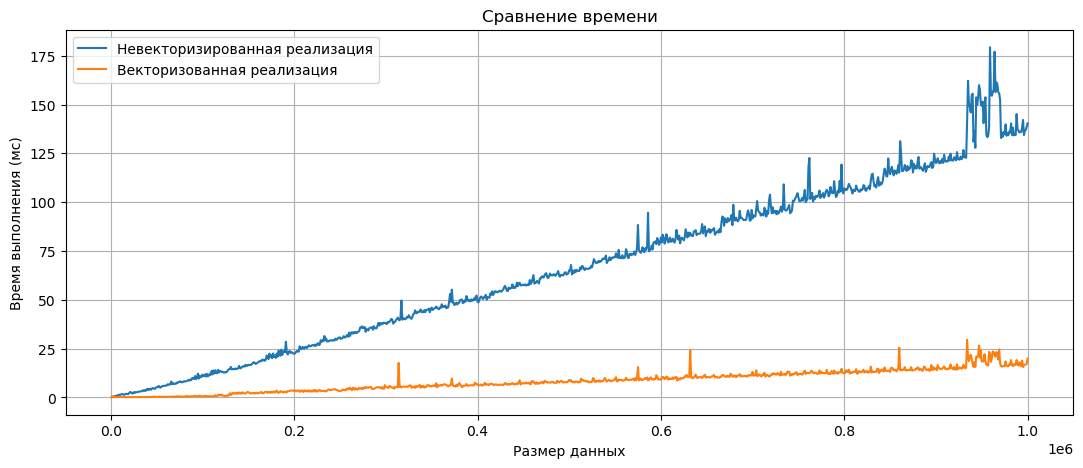

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import time
import functions
import functions_vectorized

sizes = []
for j in range(1000, 1000001, 1000):
    sizes.append(j)

base_times = np.zeros(len(sizes))
vector_times = np.zeros(len(sizes))


for k in range(0, len(sizes)):

    data = np.random.randint(-50, 50, size=sizes[k])
    
    start = time.time() * 1000
    functions.run_length_encoding(data)
    base_times[k] = time.time() * 1000 - start
    
    start = time.time() * 1000
    functions_vectorized.run_length_encoding(data)
    vector_times[k] = time.time() * 1000 - start

fig, plot_area = plt.subplots(1, 1, figsize=(13, 5))

plot_area.plot(sizes, base_times, label=u"Невекторизированная реализация")
plot_area.plot(sizes, vector_times, label=u"Векторизованная реализация")
plot_area.set_title(u"Сравнение времени")
plot_area.set_xlabel(u"Размер данных")
plot_area.set_ylabel(u"Время выполнения (мс)")
plot_area.grid()
plot_area.legend()

plt.show()

 
 
* __Задача 6__: Даны две выборки объектов - X и Y. Вычислить матрицу евклидовых расстояний между объектами. Дополнительно сравните с функцией scipy.spatial.distance.cdist по скорости работы (сравнения приведите ниже в ноутбуке).

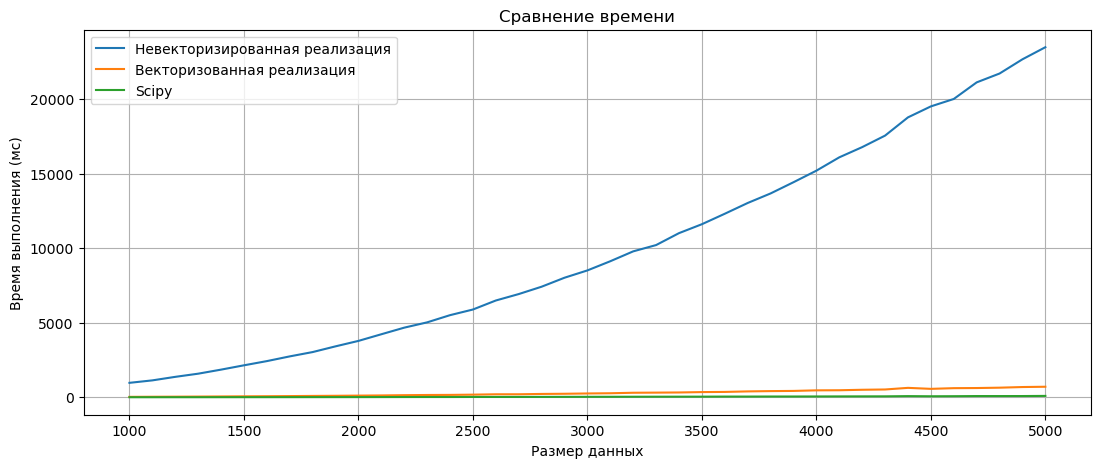

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import time
import scipy.spatial
import functions
import functions_vectorized

dimensions = []
for j in range(1000, 5001, 100):
    dimensions.append(j)

standard_times = np.zeros(len(dimensions))
vector_times = np.zeros(len(dimensions))
scipy_times = np.zeros(len(dimensions))

for k in range(0, len(dimensions)):
    set_a = np.random.rand(dimensions[k], 2)
    set_b = np.random.rand(dimensions[k], 2)
    
    start = time.time() * 1000
    functions.pairwise_distance(set_a, set_b)
    standard_times[k] = time.time() * 1000 - start
    
    start = time.time() * 1000
    functions_vectorized.pairwise_distance(set_a, set_b)
    vector_times[k] = time.time() * 1000 - start
    
    start = time.time() * 1000
    scipy.spatial.distance.cdist(set_a, set_b)
    scipy_times[k] = time.time() * 1000 - start

figure, plot_area = plt.subplots(1, 1, figsize=(13, 5))

plot_area.plot(dimensions, standard_times, label=u"Невекторизированная реализация")
plot_area.plot(dimensions, vector_times, label=u"Векторизованная реализация")
plot_area.plot(dimensions, scipy_times, label=u"Scipy")
plot_area.set_title(u"Сравнение времени")
plot_area.set_xlabel(u"Размер данных")
plot_area.set_ylabel(u"Время выполнения (мс)")
plot_area.grid()
plot_area.legend()

plt.show()

### Туториал по Markdown

__(1 балл)__

Напишите краткий (а в данной домашке ещё и почти бесмысленный) отчёт с использованием 4-5 различных вариантов разметки/выделения текста.

# Отчет по домашнему заданию

**Работа с numpy**

- Изучение документации **numpy** оказалось полезным опытом, позволившим узнать новые приемы. Решения задач стали более компактными и элегантными благодаря использованию векторных операций.

**Результаты сравнения**

 - Векторизованные реализации показывают лучшую производительность по сравнению с обычными. Как мне кажется, это объясняется тем, что **numpy** реализован не только на **Python**, но и использует оптимизированные низкоуровневые библиотеки, что ускоряет вычисления. 